In [1]:
import pandas as pd
import geopandas as gpd
import json
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../final_dfs/for_modeling/df_final_stationery.csv')

In [3]:
df.shape

(401, 179)

In [4]:
#list(df.columns)

In [5]:
def fix_ags5(x):
    if len(str(x))==4:
        return '0'+str(x)
    else:
        return str(x)
df['ags5'] = df['ags5'].apply(fix_ags5)

In [6]:
df['cluster'] = df['cluster'].astype(str)

In [7]:
df_plot = df[['cluster', 'ags5', 'kreis']]

In [27]:
df['cluster'].value_counts()

0    332
2     67
1      2
Name: cluster, dtype: int64

In [8]:
gdf = gpd.read_file('../../georef-germany-kreis/georef-germany-kreis-millesime.shp')

In [9]:
gdf.shape

(401, 9)

<AxesSubplot:>

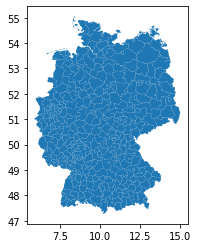

In [10]:
gdf.plot()

In [11]:
merged = pd.merge(df_plot, gdf, left_on='ags5', right_on='krs_code')

In [12]:
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

In [13]:
merged['longitude'] = merged['coords'].str[0]
merged['latitude'] = merged['coords'].str[1]

In [14]:
merged = gpd.GeoDataFrame(merged)

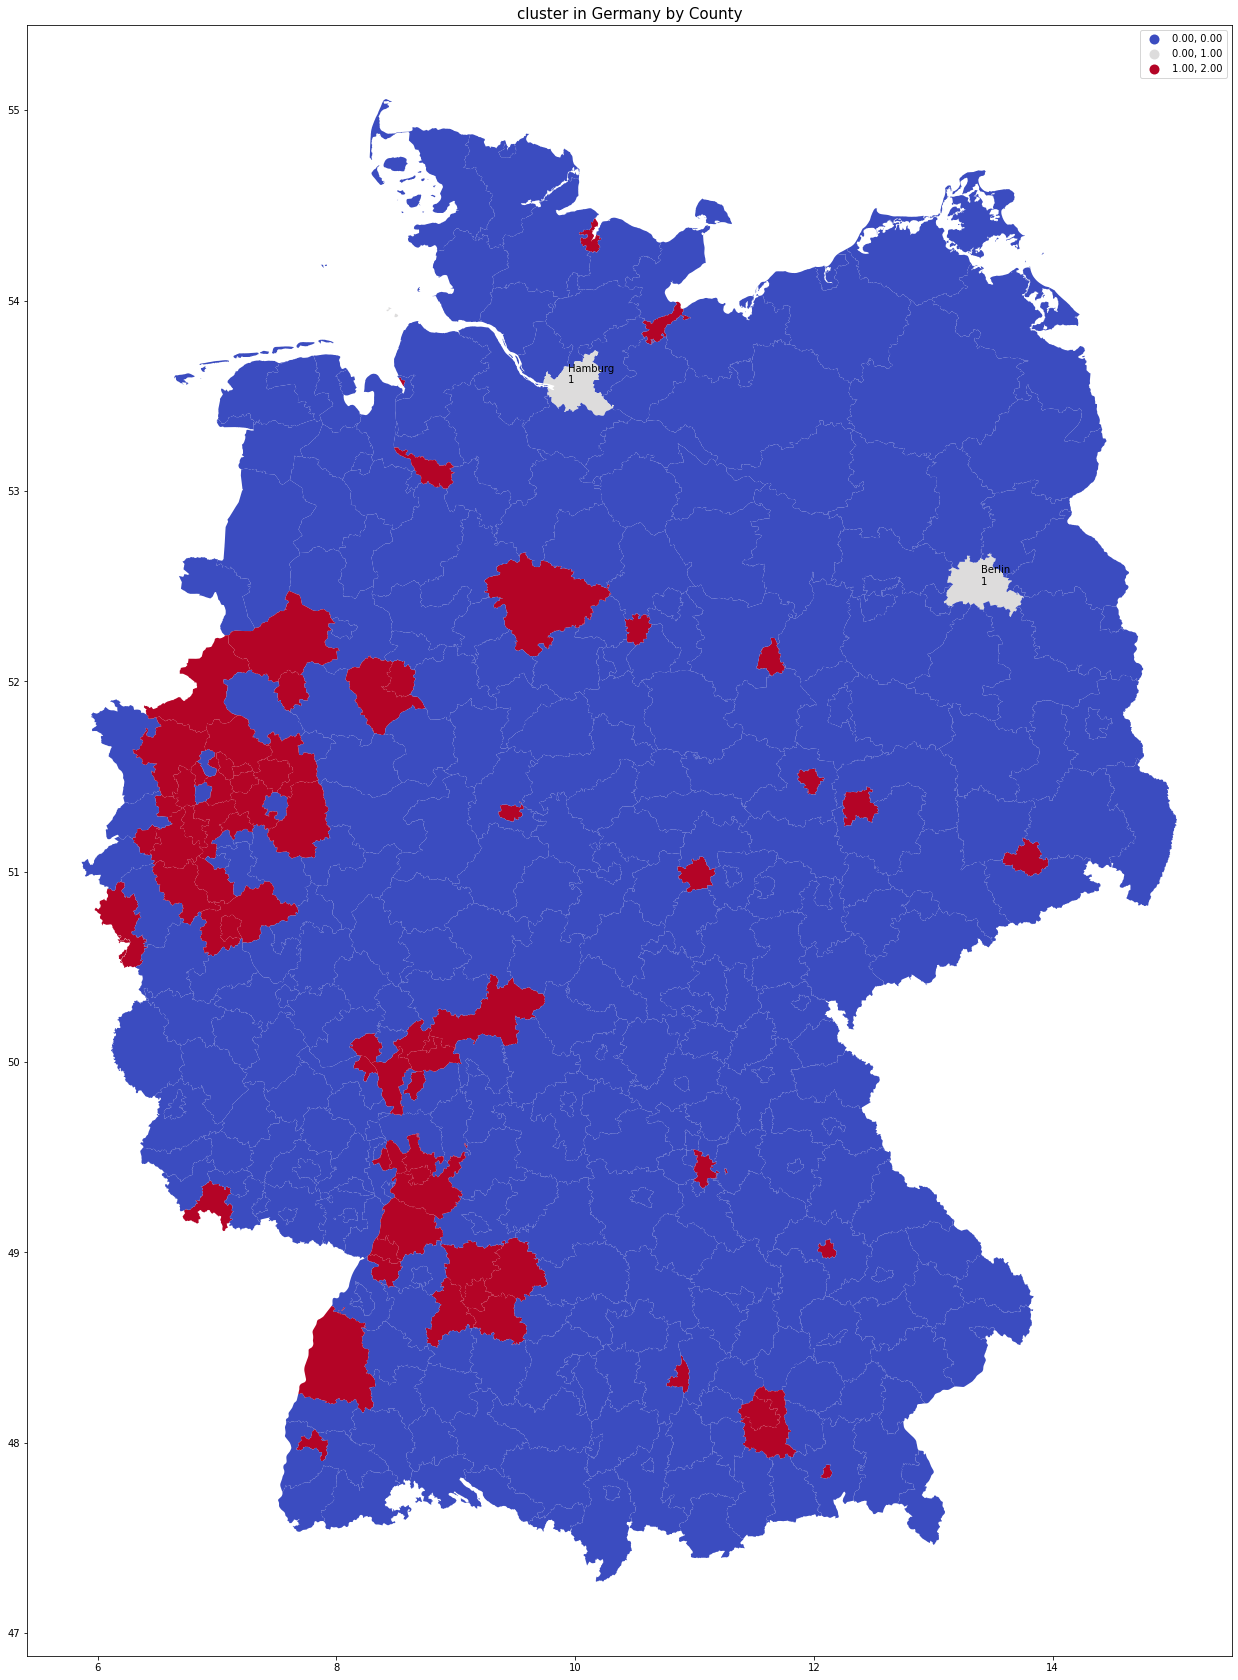

In [26]:
col = 'cluster'

fig, ax = plt.subplots(figsize=(50,30))
merged.plot(column=col, 
            #scheme="natural_breaks",
            scheme='user_defined', classification_kwds={'bins':[0, 1, 2]},
            ax=ax,
            cmap='coolwarm', legend=True)

# filter
merged_filtered = merged[merged['cluster']=='1']

# add text
for i in merged_filtered.index:
    ax.text(merged_filtered.longitude[i], merged_filtered.latitude[i],
             f'{merged_filtered["kreis"][i]}\n{merged_filtered["cluster"][i]}', fontsize=10)

ax.set_title(f'{col} in Germany by County',fontsize=15)

plt.show()